# Predicting if a PGA Tour Player won a tournament and their Earnings

### Analyse various aspects of the game and access the change in golf over. Using multiple classification methods such as SVM, Random Forest Classification and logistic regression

# 1. Import Data and Access Quality

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r'C:\Users\WALSHE32\OneDrive - Pfizer\Documents\Python Projects\PGA-Tour-Data-Science-Project-master\PGA-Tour-Data-Science-Project-master\pgatour_raw.csv', engine='python')

In [3]:
df.head()

,Unnamed: 0,NAME,ROUNDS,SCORING,DRIVE_DISTANCE,FWY_%,GIR_%,SG_P,SG_TTG,SG_T,POINTS,TOP 10,1ST,Year,MONEY,COUNTRY
0,0,Aaron Baddeley,83,70.088,291.9,60.00,60.35,0.629,0.435,1.064,"17,703",7.0,1.0,2007,"$3,441,119",AUS
1,1,Adam Scott,69,70.008,300.9,59.17,65.44,0.129,1.105,1.234,"15,630",6.0,1.0,2007,"$3,413,185",AUS
2,2,Alex Cejka,80,70.437,288.9,68.08,69.44,-0.479,1.207,0.728,"2,400",4.0,NaN,2007,"$868,303",GER
3,3,Anders Hansen,55,70.856,280.7,66.95,62.85,-0.176,0.087,-0.089,"1,989",NaN,NaN,2007,"$461,216",DEN
4,4,Andrew Buckle,77,71.443,294.7,58.14,62.52,0.161,-0.426,-0.265,"1,875",1.0,NaN,2007,"$513,630",AUS


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2044 entries, 0 to 2043
Data columns (total 16 columns):
Unnamed: 0        2044 non-null int64
NAME              2044 non-null object
ROUNDS            2044 non-null int64
SCORING           2044 non-null float64
DRIVE_DISTANCE    2044 non-null float64
FWY_%             2044 non-null float64
GIR_%             2044 non-null float64
SG_P              2044 non-null float64
SG_TTG            2044 non-null float64
SG_T              2044 non-null float64
POINTS            2044 non-null object
TOP 10            1692 non-null float64
1ST               371 non-null float64
Year              2044 non-null int64
MONEY             2044 non-null object
COUNTRY           2044 non-null object
dtypes: float64(9), int64(3), object(4)
memory usage: 255.6+ KB


In [5]:
#import packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Cleaning the Data
### - Drop the dollar sign and commas in the money column
### - Convert null values in Top 10's and 1st to 0 and change to integer
### - Change data type of Money, Points to integer
### - Drop NaN values for players who don't have full statistics

In [6]:
#replacing NaN with 0 in top 10 column and changing to int
df['TOP 10'].fillna(0, inplace=True)
df['TOP 10'] = df['TOP 10'].astype(int)

#doing the same for number of wins
df['1ST'].fillna(0, inplace=True)
df['1ST'] = df['1ST'].astype(int)

In [7]:
#changing data type of money and rounds to integer
df['POINTS'] = df['POINTS'].apply(lambda x: x.replace(',', ''))
df['POINTS'] = df['POINTS'].astype(int)

df['MONEY'] = df['MONEY'].apply(lambda x: x.replace('$', ''))
df['MONEY'] = df['MONEY'].apply(lambda x: x.replace(',', ''))
df['MONEY'] = df['MONEY'].astype(int)

In [8]:
#dropping any null values
df.dropna(axis = 0, inplace = True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2044 entries, 0 to 2043
Data columns (total 16 columns):
Unnamed: 0        2044 non-null int64
NAME              2044 non-null object
ROUNDS            2044 non-null int64
SCORING           2044 non-null float64
DRIVE_DISTANCE    2044 non-null float64
FWY_%             2044 non-null float64
GIR_%             2044 non-null float64
SG_P              2044 non-null float64
SG_TTG            2044 non-null float64
SG_T              2044 non-null float64
POINTS            2044 non-null int32
TOP 10            2044 non-null int32
1ST               2044 non-null int32
Year              2044 non-null int64
MONEY             2044 non-null int32
COUNTRY           2044 non-null object
dtypes: float64(7), int32(4), int64(3), object(2)
memory usage: 239.5+ KB


In [10]:
df.head()

,Unnamed: 0,NAME,ROUNDS,SCORING,DRIVE_DISTANCE,FWY_%,GIR_%,SG_P,SG_TTG,SG_T,POINTS,TOP 10,1ST,Year,MONEY,COUNTRY
0,0,Aaron Baddeley,83,70.088,291.9,60.00,60.35,0.629,0.435,1.064,17703,7,1,2007,3441119,AUS
1,1,Adam Scott,69,70.008,300.9,59.17,65.44,0.129,1.105,1.234,15630,6,1,2007,3413185,AUS
2,2,Alex Cejka,80,70.437,288.9,68.08,69.44,-0.479,1.207,0.728,2400,4,0,2007,868303,GER
3,3,Anders Hansen,55,70.856,280.7,66.95,62.85,-0.176,0.087,-0.089,1989,0,0,2007,461216,DEN
4,4,Andrew Buckle,77,71.443,294.7,58.14,62.52,0.161,-0.426,-0.265,1875,1,0,2007,513630,AUS


In [11]:
df.describe()

,Unnamed: 0,ROUNDS,SCORING,DRIVE_DISTANCE,FWY_%,GIR_%,SG_P,SG_TTG,SG_T,POINTS,TOP 10,1ST,Year,MONEY
count,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2.044000e+03
mean,1021.500000,79.355186,70.912630,289.540068,62.036404,65.412480,0.022556,0.129178,0.151788,1790.963796,2.675147,0.234344,2011.949119,1.419303e+06
std,590.196295,14.604295,0.681575,8.710074,5.209013,2.650798,0.351150,0.621524,0.675791,3833.522276,2.411051,0.593136,3.185158,1.325270e+06
min,0.000000,45.000000,67.794000,259.000000,41.860000,54.230000,-1.475000,-3.340000,-3.209000,6.000000,0.000000,0.000000,2007.000000,4.546000e+04
25%,510.750000,69.000000,70.490500,283.600000,58.510000,63.640000,-0.194000,-0.259500,-0.262500,360.000000,1.000000,0.000000,2009.000000,5.564188e+05
50%,1021.500000,80.000000,70.899000,289.300000,62.040000,65.560000,0.036000,0.140500,0.157500,659.000000,2.000000,0.000000,2012.000000,1.016720e+06
75%,1532.250000,90.000000,71.338750,295.200000,65.605000,67.122500,0.261000,0.528000,0.564250,1272.000000,4.000000,0.000000,2015.000000,1.809302e+06
max,2043.000000,124.000000,74.262000,318.400000,80.420000,73.520000,1.130000,2.380000,3.189000,53607.000000,15.000000,7.000000,2017.000000,1.203046e+07


In [12]:
df.drop(columns = 'Unnamed: 0', inplace=True)

In [13]:
df.head()

,NAME,ROUNDS,SCORING,DRIVE_DISTANCE,FWY_%,GIR_%,SG_P,SG_TTG,SG_T,POINTS,TOP 10,1ST,Year,MONEY,COUNTRY
0,Aaron Baddeley,83,70.088,291.9,60.00,60.35,0.629,0.435,1.064,17703,7,1,2007,3441119,AUS
1,Adam Scott,69,70.008,300.9,59.17,65.44,0.129,1.105,1.234,15630,6,1,2007,3413185,AUS
2,Alex Cejka,80,70.437,288.9,68.08,69.44,-0.479,1.207,0.728,2400,4,0,2007,868303,GER
3,Anders Hansen,55,70.856,280.7,66.95,62.85,-0.176,0.087,-0.089,1989,0,0,2007,461216,DEN
4,Andrew Buckle,77,71.443,294.7,58.14,62.52,0.161,-0.426,-0.265,1875,1,0,2007,513630,AUS


In [14]:
df.tail()

,NAME,ROUNDS,SCORING,DRIVE_DISTANCE,FWY_%,GIR_%,SG_P,SG_TTG,SG_T,POINTS,TOP 10,1ST,Year,MONEY,COUNTRY
2039,Whee Kim,74,70.964,289.4,54.32,62.09,0.456,-0.688,-0.232,583,2,0,2017,1125368,KOR
2040,William McGirt,89,71.151,284.8,70.06,67.23,-0.018,-0.049,-0.067,621,3,0,2017,1225005,USA
2041,Xander Schauffele,96,70.163,306.3,57.68,67.74,0.342,0.382,0.724,2151,4,2,2017,4312674,USA
2042,Zac Blair,105,71.007,272.7,69.70,64.70,0.035,-0.078,-0.044,364,1,0,2017,788352,USA
2043,Zach Johnson,81,70.393,286.8,66.54,64.16,0.415,0.169,0.584,1017,4,0,2017,2362968,USA


In [15]:
df.describe()

,ROUNDS,SCORING,DRIVE_DISTANCE,FWY_%,GIR_%,SG_P,SG_TTG,SG_T,POINTS,TOP 10,1ST,Year,MONEY
count,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2.044000e+03
mean,79.355186,70.912630,289.540068,62.036404,65.412480,0.022556,0.129178,0.151788,1790.963796,2.675147,0.234344,2011.949119,1.419303e+06
std,14.604295,0.681575,8.710074,5.209013,2.650798,0.351150,0.621524,0.675791,3833.522276,2.411051,0.593136,3.185158,1.325270e+06
min,45.000000,67.794000,259.000000,41.860000,54.230000,-1.475000,-3.340000,-3.209000,6.000000,0.000000,0.000000,2007.000000,4.546000e+04
25%,69.000000,70.490500,283.600000,58.510000,63.640000,-0.194000,-0.259500,-0.262500,360.000000,1.000000,0.000000,2009.000000,5.564188e+05
50%,80.000000,70.899000,289.300000,62.040000,65.560000,0.036000,0.140500,0.157500,659.000000,2.000000,0.000000,2012.000000,1.016720e+06
75%,90.000000,71.338750,295.200000,65.605000,67.122500,0.261000,0.528000,0.564250,1272.000000,4.000000,0.000000,2015.000000,1.809302e+06
max,124.000000,74.262000,318.400000,80.420000,73.520000,1.130000,2.380000,3.189000,53607.000000,15.000000,7.000000,2017.000000,1.203046e+07


# 3. Exploratory Data Analysis and Visualising Data

TypeError: unsupported operand type(s) for /: 'str' and 'int'

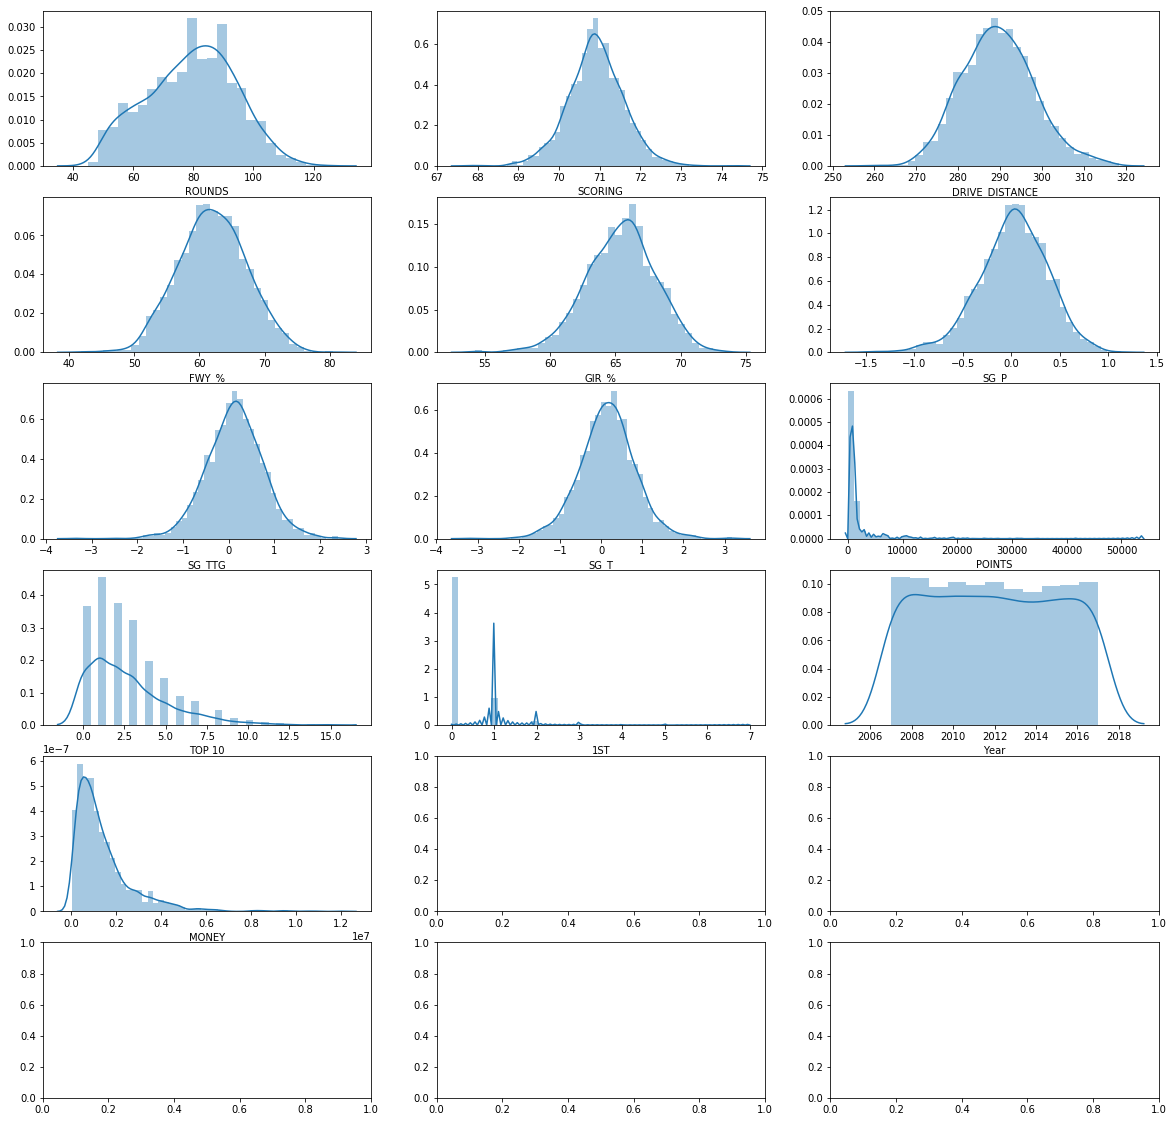

In [16]:
#checking the distribution of the data
f, ax = plt.subplots(nrows=6, ncols=3, figsize=(20,20))
dist = df.loc[:,df.columns!='NAME'].columns
rows = 0
cols = 0
for i,column in enumerate(dist):
    p = sns.distplot(df[column], ax=ax[rows][cols])
    cols += 1
    if cols == 3:
        cols = 0
        rows +=1

### Interesting to note that Money, Wins, Top 10's, and points are all skewed to the right. This could be due to the separation of the top players on tour and the guys in the middle of the pack. Top players who are winning or frequently in the top 10 will have higher earnings as well as more points.

## 3.a Exploring Wins and Top 10's by year

In [17]:
#number of players with wins each year
win = df.groupby('Year')['1ST'].value_counts()
win = win.unstack()
win.fillna(0, inplace=True)

win = win.astype(int)

print(win)

1ST     0   1  2  3  4  5  6  7
Year                           
2007  161  28  4  1  0  0  0  1
2008  158  30  4  2  0  0  0  0
2009  154  20  5  2  0  0  1  0
2010  157  25  6  1  0  0  0  0
2011  149  29  7  0  0  0  0  0
2012  152  31  4  1  1  0  0  0
2013  149  24  5  0  0  1  0  0
2014  140  29  5  2  0  0  0  0
2015  150  28  3  0  0  2  0  0
2016  149  29  4  2  0  0  0  0
2017  154  28  2  2  1  1  0  0


### From the above table we can see that majority of players end the season without a win. It is also very rare that a player wins a tournament more than once during the season

In [18]:
#percentage of players without a win
players = win.apply(lambda x: np.sum(x), axis = 1)
win_percent = win[0]/players
win_percent = win_percent*100
print(win_percent)

Year
2007    82.564103
2008    81.443299
2009    84.615385
2010    83.068783
2011    80.540541
2012    80.423280
2013    83.240223
2014    79.545455
2015    81.967213
2016    80.978261
2017    81.914894
dtype: float64


Text(0.5, 1.0, 'Percentage of Players without a Win')

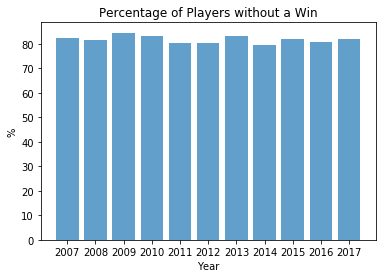

In [19]:
#plotting the percentage of players without a win
fig, ax = plt.subplots()
bar_width = 0.8
opacity = 0.7 
index = np.arange(2007, 2018)

plt.bar(index, win_percent, bar_width, alpha = opacity)
plt.xticks(index)
plt.xlabel('Year')
plt.ylabel('%')
plt.title('Percentage of Players without a Win')


### The number of players without a win is around 80% with very little variation over the 10 years

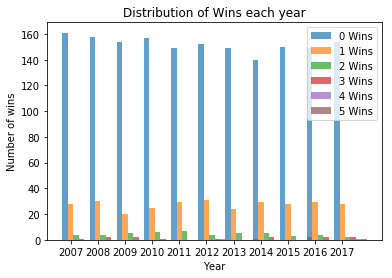

In [20]:
#Plotting the number of wins on bar chart
fig, ax = plt.subplots()
bar_width = 0.2
opacity = 0.7 
index = np.arange(2007, 2018)

def plot_bar(index, win, labels):
    plt.bar(index, win, bar_width, alpha = opacity, label = labels)
    
bar = plot_bar(index, win[0], labels = '0 Wins')
bar1 = plot_bar(index + bar_width, win[1], labels = '1 Wins')
bar2 = plot_bar(index + bar_width*2, win[2], labels = '2 Wins')
bar3 = plot_bar(index + bar_width*3, win[3], labels = '3 Wins')
bar4 = plot_bar(index + bar_width*4, win[4], labels = '4 Wins')
bar5 = plot_bar(index + bar_width*5, win[5], labels = '5 Wins')

plt.xticks(index + bar_width, index)
plt.xlabel('Year')
plt.ylabel('Number of wins')
plt.title('Distribution of Wins each year')
plt.legend()


### The above plot shows the rarity of winning a PGA Tour Event regardless of the year and then how few do it more than once

In [21]:
#Percentage of people who did not place in the top 10 each year
topten = df.groupby('Year')['TOP 10'].value_counts()
topten = topten.unstack()
topten.fillna(0, inplace = True)
players = topten.apply(lambda x: np.sum(x), axis=1)

no_topten = topten[0]/players*100
print(no_topten)

Year
2007    18.974359
2008    15.979381
2009    14.285714
2010    12.698413
2011    22.702703
2012    17.460317
2013    18.435754
2014    15.909091
2015    18.579235
2016    19.565217
2017    14.893617
dtype: float64


### The above table shows that the number of players that don't place in the Top 10 is just under 20%. The variance on a annual basis is also quite low with the lowest percent being 12.7% and the highest being 22.7%.

## 3.b Exploring the longest hitters on tour

In [22]:
distance = df[['Year', 'NAME', 'DRIVE_DISTANCE']].copy()
distance.sort_values(by = 'DRIVE_DISTANCE', inplace = True, ascending = False)
print(distance.head())

      Year             NAME  DRIVE_DISTANCE
833   2011      J.B. Holmes           318.4
1545  2015   Dustin Johnson           317.7
2000  2017     Rory McIlroy           316.7
715   2010  Robert Garrigus           315.5
971   2012     Bubba Watson           315.5


## 3.c Exploring the earnings of the Players

In [23]:
money_rank = df[['Year', 'NAME', 'MONEY']].copy()
money_rank.sort_values(by = 'MONEY', inplace = True, ascending = False)
print(money_rank.head())

      Year           NAME     MONEY
1590  2015  Jordan Spieth  12030465
177   2007    Tiger Woods  10867052
554   2009    Tiger Woods  10508163
1949  2017  Justin Thomas   9921560
1946  2017  Jordan Spieth   9433033


In [24]:
#Who made the most money each year
money_rank = money_rank.groupby('Year')['MONEY'].max()
money_rank = pd.DataFrame(money_rank)
print(money_rank.iloc[0,0])

indexs = np.arange(2007,2018)
names = []
for i in range(money_rank.shape[0]):
    temp = df.loc[df['MONEY'] == money_rank.iloc[i,0], 'NAME']
    names.append(str(temp.values[0]))

money_rank['NAME'] = names
print(money_rank)

10867052
         MONEY            NAME
Year                          
2007  10867052     Tiger Woods
2008   6601094     Vijay Singh
2009  10508163     Tiger Woods
2010   4910477     Matt Kuchar
2011   6683214     Luke Donald
2012   8047952    Rory McIlroy
2013   8553439     Tiger Woods
2014   8280096    Rory McIlroy
2015  12030465   Jordan Spieth
2016   9365185  Dustin Johnson
2017   9921560   Justin Thomas


## 3.d Analysing Golf Statistics Over Time

Index(['ROUNDS', 'SCORING', 'DRIVE_DISTANCE', 'FWY_%', 'GIR_%', 'SG_P',
       'SG_TTG', 'SG_T', 'POINTS', 'TOP 10', '1ST', 'MONEY', 'COUNTRY'],
      dtype='object')


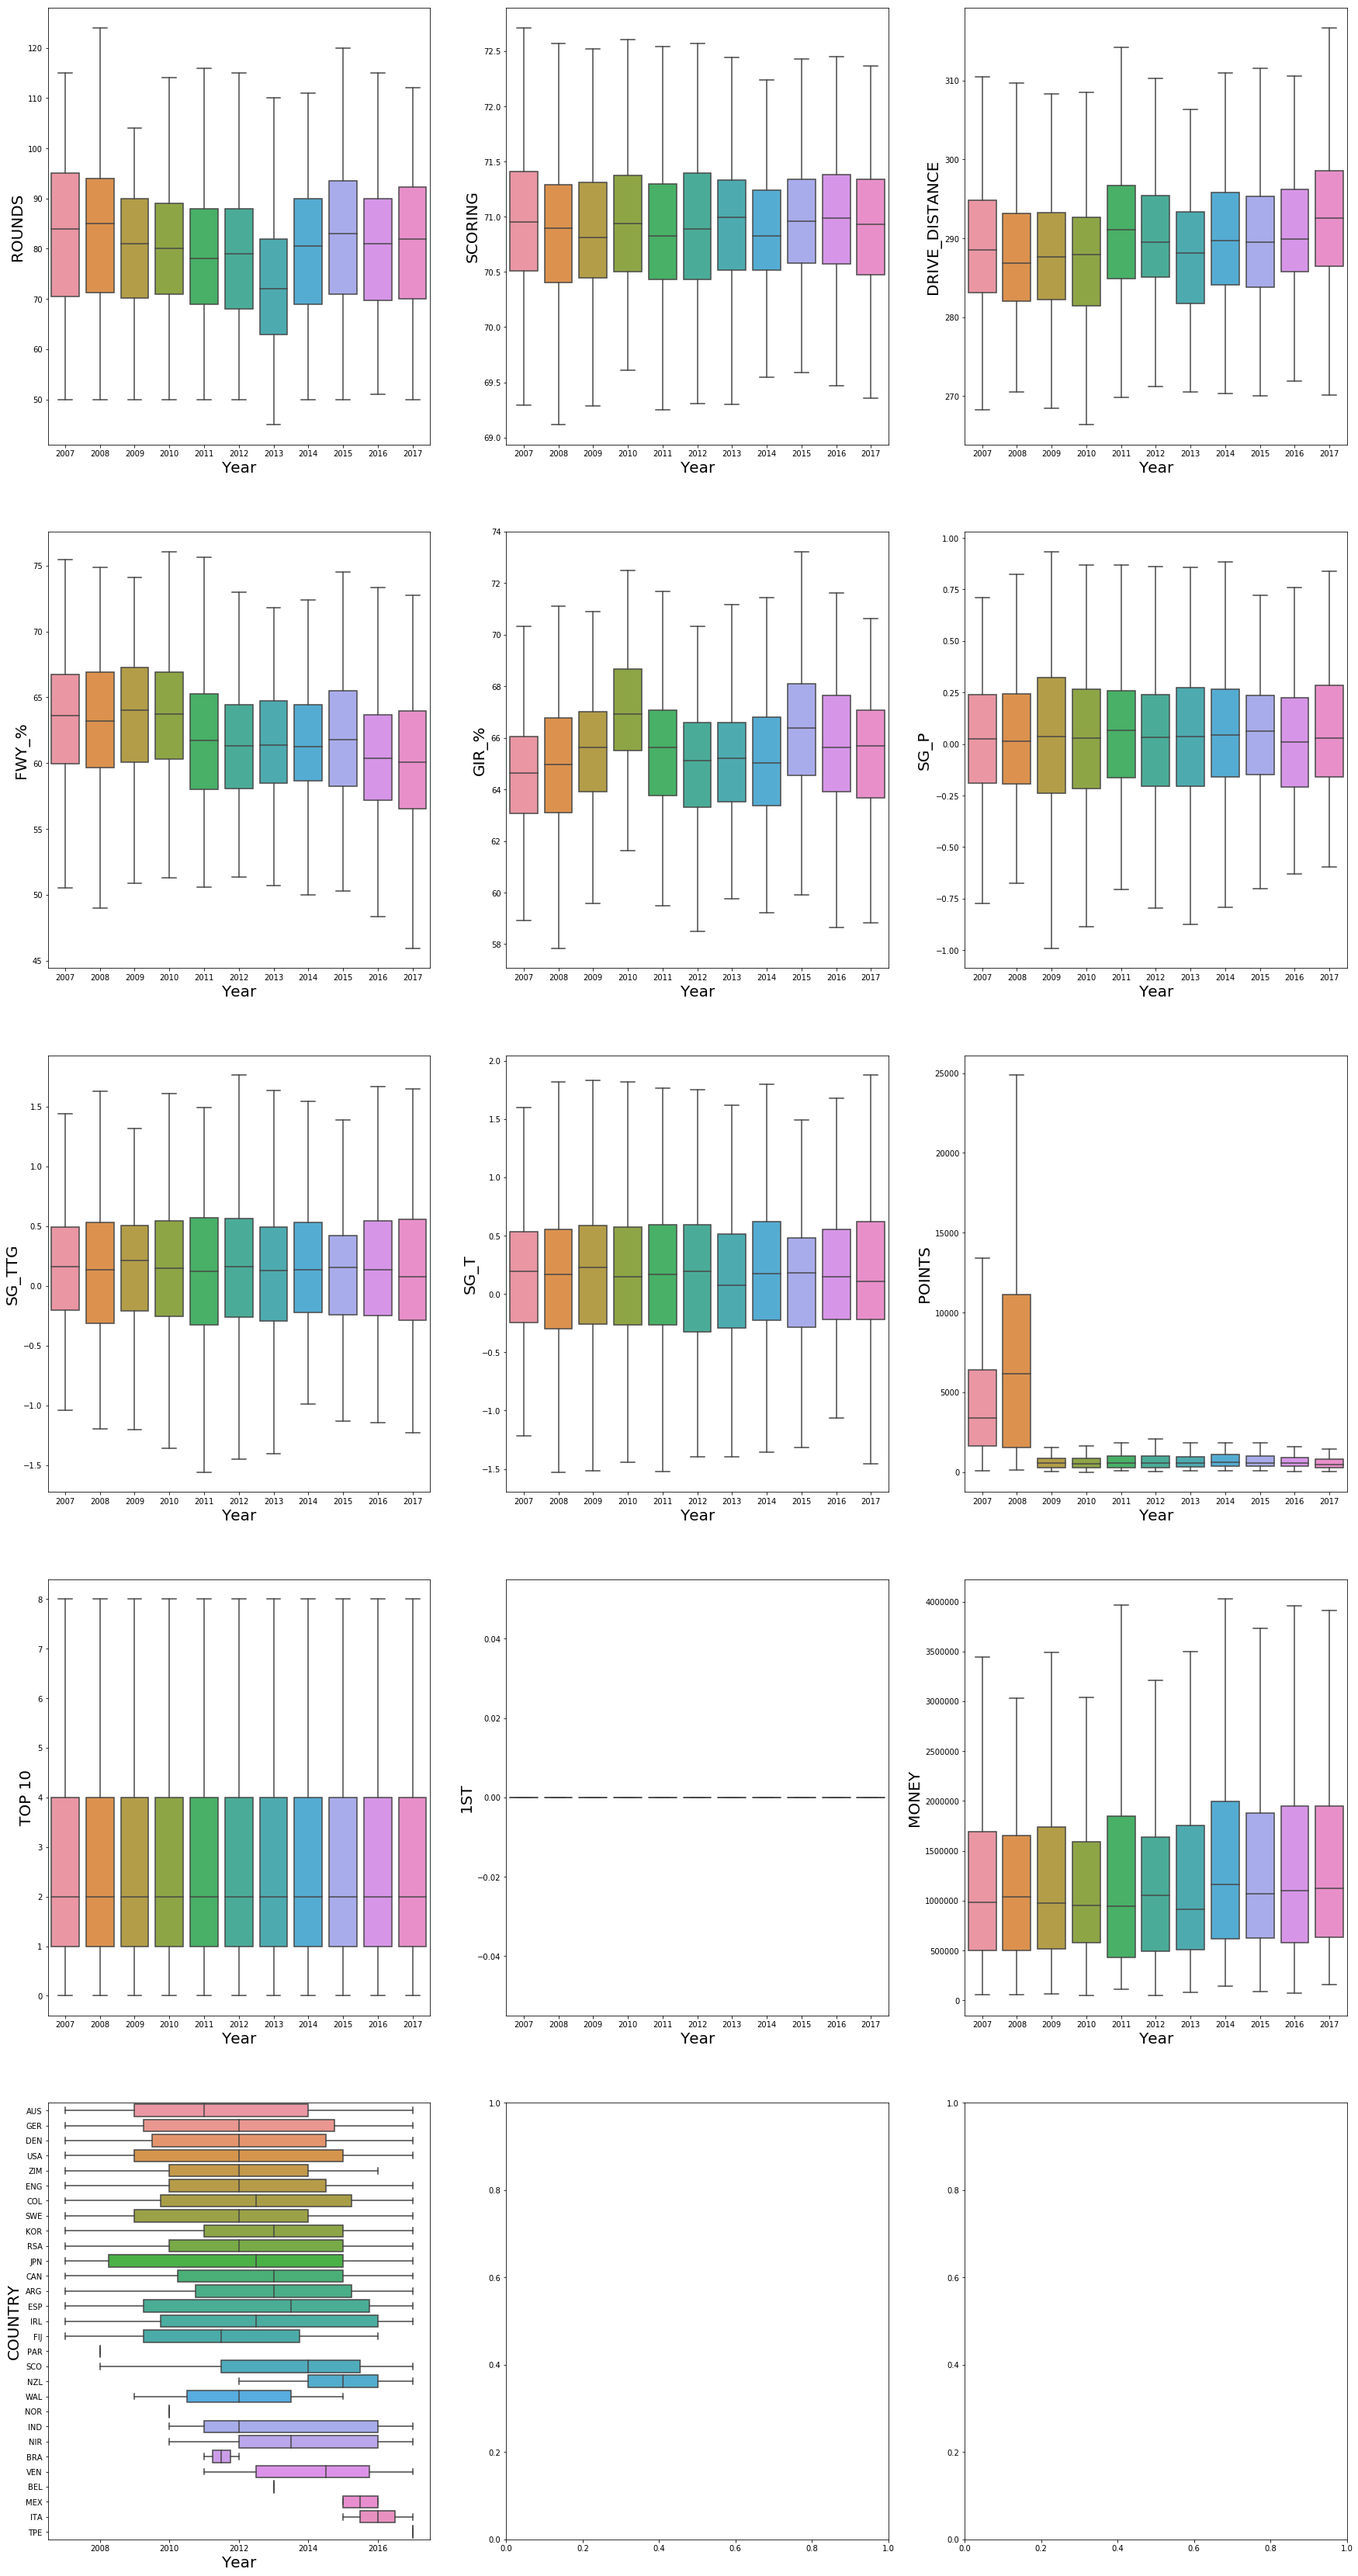

In [25]:
f, ax = plt.subplots(nrows = 5, ncols = 3, figsize = (30,60))
distribution = df.loc[:, (df.columns!='NAME') & (df.columns!='Wins')].columns
distribution = distribution[distribution != 'Year']

print(distribution)
rows = 0
cols = 0
for i,column  in enumerate(distribution):
    p = sns.boxplot(x = 'Year', y = column, data = df, ax=ax[rows][cols], showfliers = False)
    p.set_ylabel(column, fontsize=20)
    p.set_xlabel('Year', fontsize=20)
    cols +=1 
    if cols == 3:
        cols = 0
        rows+=1

## 3.e Comparing the Average Player to the Champions

In [26]:
champion = df.loc[df['1ST']>=1, :]
print(champion.head())

               NAME  ROUNDS  SCORING  DRIVE_DISTANCE  FWY_%  GIR_%   SG_P  \
0    Aaron Baddeley      83   70.088           291.9  60.00  60.35  0.629   
1        Adam Scott      69   70.008           300.9  59.17  65.44  0.129   
16      Boo Weekley     101   70.303           296.6  64.65  65.86 -0.192   
17  Brandt Snedeker     105   70.089           285.6  59.80  64.58  0.511   
21    Brian Bateman      55   71.657           291.6  58.74  61.33 -0.079   

    SG_TTG   SG_T  POINTS  TOP 10  1ST  Year    MONEY COUNTRY  
0    0.435  1.064   17703       7    1  2007  3441119     AUS  
1    1.105  1.234   15630       6    1  2007  3413185     AUS  
16   0.819  0.627   10790       5    1  2007  2613211     USA  
17   0.161  0.672   13277       6    1  2007  2836643     USA  
21  -0.660 -0.739    5102       1    1  2007  1022763     USA  


DataError: No numeric types to aggregate

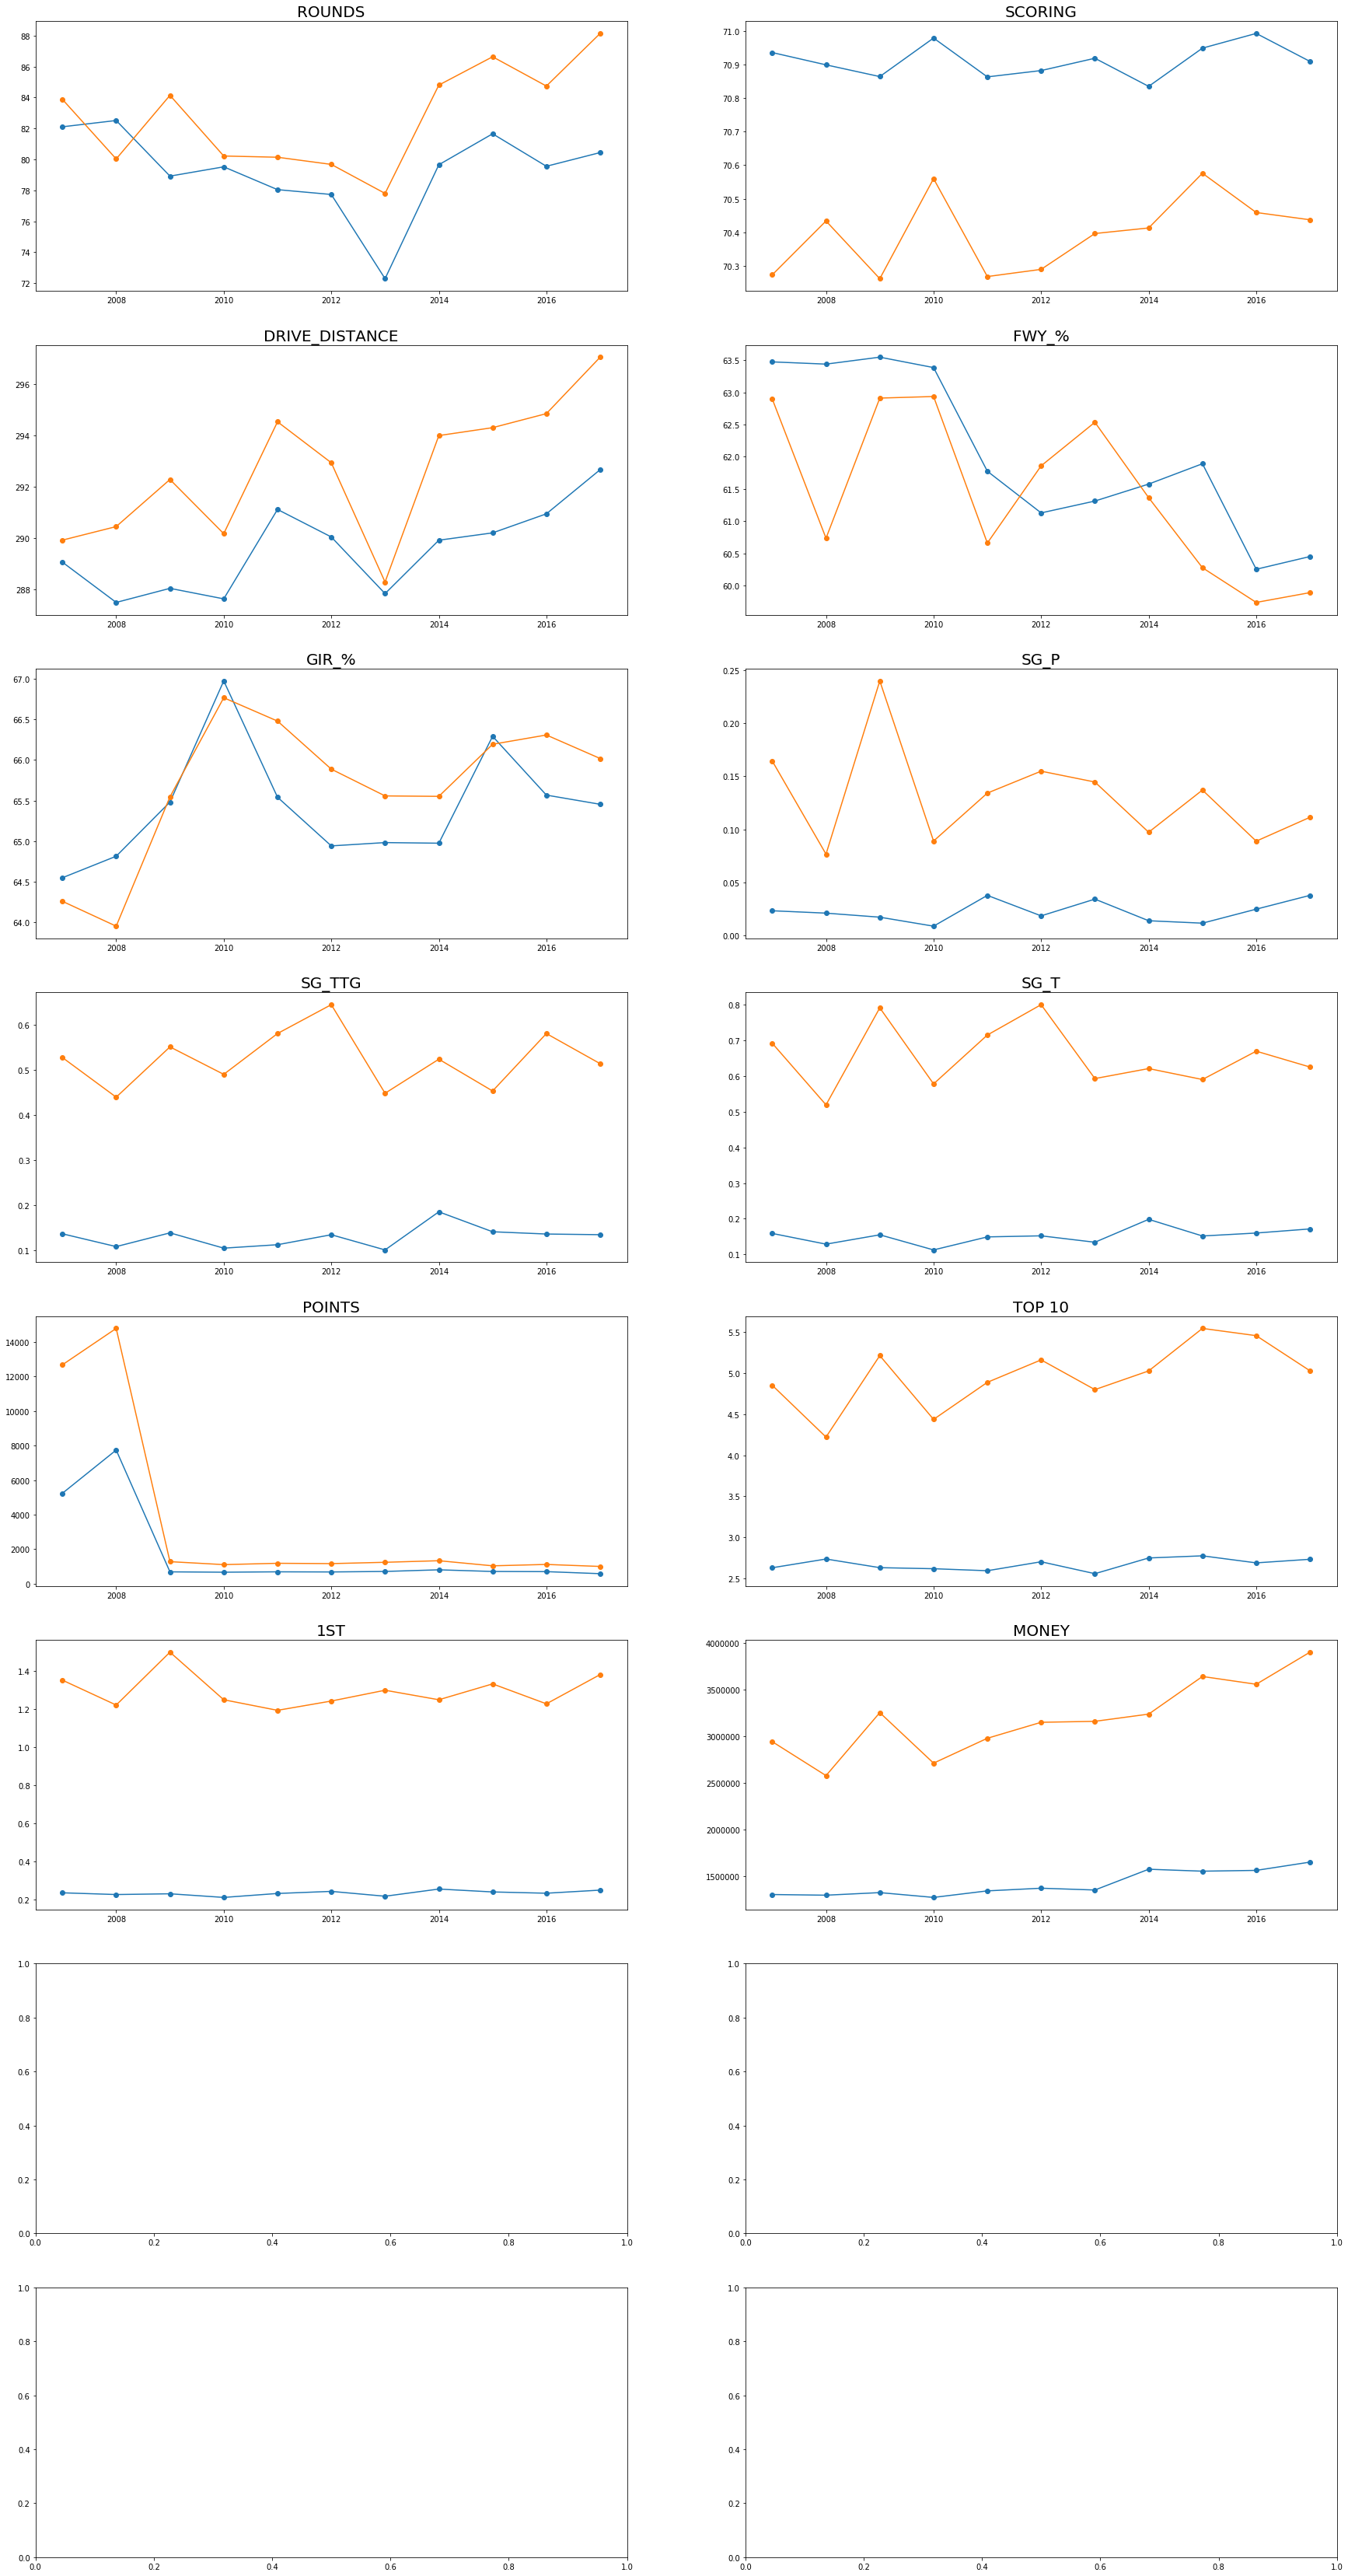

In [27]:
f, ax = plt.subplots(nrows = 8, ncols = 2, figsize=(30,60))
distribution = df.loc[:,df.columns!='NAME'].columns
distribution = distribution[distribution != 'Year']

rows = 0
cols = 0
lower_better = ['SCORING']
for i, column in enumerate(distribution):
    avg = df.groupby('Year')[column].mean()
    best = champion.groupby('Year')[column].mean()
    ax[rows,cols].plot(avg, 'o-',)
    ax[rows,cols].plot(best, 'o-',)
    ax[rows,cols].set_title(column, fontsize = 20)
    
    cols +=1
    if cols ==2:
        cols = 0
        rows +=1

### It should be noted that the main indicators of what divides the champions from the average players is Strokes Gained Putting, Strokes Gained off the Tee and Strokes Gained Tee to Green, as well as Top 10's.

## Correlation

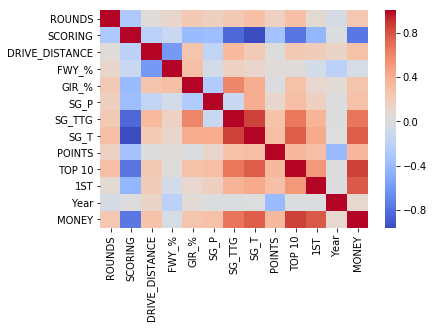

In [28]:
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap='coolwarm')

In [29]:
df.corr()['1ST']

ROUNDS            0.067178
SCORING          -0.427935
DRIVE_DISTANCE    0.193432
FWY_%            -0.062438
GIR_%             0.103625
SG_P              0.169833
SG_TTG            0.366939
SG_T              0.425788
POINTS            0.290491
TOP 10            0.514983
1ST               1.000000
Year              0.009683
MONEY             0.772347
Name: 1ST, dtype: float64

# Machine Learning

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report

In [31]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler

In [32]:
#preparing the data for classification

#adding a winner column to determine if the player won that year or not
df['Winner'] = df['1ST'].apply(lambda x: 1 if x>0 else 0)

#new df
pga_df = df.copy()

#y value is the target/value for the machine learning - column Winner
target = df['Winner']

#removing name, 1st and winner from the dataframe
pga_df.drop(['NAME', '1ST', 'Winner', 'COUNTRY'], axis = 1, inplace = True)
print(pga_df.head())

   ROUNDS  SCORING  DRIVE_DISTANCE  FWY_%  GIR_%   SG_P  SG_TTG   SG_T  \
0      83   70.088           291.9  60.00  60.35  0.629   0.435  1.064   
1      69   70.008           300.9  59.17  65.44  0.129   1.105  1.234   
2      80   70.437           288.9  68.08  69.44 -0.479   1.207  0.728   
3      55   70.856           280.7  66.95  62.85 -0.176   0.087 -0.089   
4      77   71.443           294.7  58.14  62.52  0.161  -0.426 -0.265   

   POINTS  TOP 10  Year    MONEY  
0   17703       7  2007  3441119  
1   15630       6  2007  3413185  
2    2400       4  2007   868303  
3    1989       0  2007   461216  
4    1875       1  2007   513630  


## Logistic Regression

In [33]:
per_no_win = target.value_counts()[0]/(target.value_counts()[0]+target.value_counts()[1])
per_no_win = per_no_win.round(4)*100
print(str(per_no_win)+str('%'))

81.85%


In [34]:
#function for logistic regression
def log_reg(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10)
    clf = LogisticRegression().fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('Accuracy of Logistic Regression Classifier on Training Set : {:.2f}'.format(clf.score(X_train, y_train)))
    print('Accuracy of Logistic Regression Classifier on Test Set : {:.2f}'.format(clf.score(X_test, y_test)))
    cf_mat = confusion_matrix(y_test, y_pred)
    confusion = pd.DataFrame(data = cf_mat)
    print(confusion)
    print(classification_report(y_test, y_pred))
    
    #returning the 5 important features
    rfe = RFE(clf, 5)
    rfe = rfe.fit(X,y)
    print('Feature Importance')
    print(X.columns[rfe.ranking_ ==1].values)
    
    print('ROC AUC Score: {:.2f}'.format(roc_auc_score(y_test, y_pred)))
    
    

In [35]:
log_reg(pga_df, target)

Accuracy of Logistic Regression Classifier on Training Set : 0.88
Accuracy of Logistic Regression Classifier on Test Set : 0.88
     0   1
0  397  19
1   42  53
              precision    recall  f1-score   support

           0       0.90      0.95      0.93       416
           1       0.74      0.56      0.63        95

   micro avg       0.88      0.88      0.88       511
   macro avg       0.82      0.76      0.78       511
weighted avg       0.87      0.88      0.87       511

Feature Importance
['SCORING' 'DRIVE_DISTANCE' 'FWY_%' 'GIR_%' 'TOP 10']
ROC AUC Score: 0.76


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages

### An accuracy of 88% on both the test and training set for the Logistic Regression was very accurate for a first time run. The ROC AUC score at 76% could be improved however. More features added to possibly improve the model

In [36]:
ml_df = pga_df.copy()

#TOP 10 or Money may give us a better understanding of how well they placed in the top 10

ml_df['Top10perMoney'] = ml_df['TOP 10'] / ml_df['MONEY']

#AVG Distance / Fairway Percentage to give us a ratio that determines how accurate and far a player hits 

ml_df['DistancePerFairway'] = ml_df['DRIVE_DISTANCE'] / ml_df['FWY_%']

#Money/Rounds to see on average how much money they would make playing a round of golf 

ml_df['MoneyPerRound'] = ml_df['MONEY'] / ml_df['ROUNDS']

In [37]:
log_reg(ml_df, target)

Accuracy of Logistic Regression Classifier on Training Set : 0.88
Accuracy of Logistic Regression Classifier on Test Set : 0.88
     0   1
0  398  18
1   43  52
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       416
           1       0.74      0.55      0.63        95

   micro avg       0.88      0.88      0.88       511
   macro avg       0.82      0.75      0.78       511
weighted avg       0.87      0.88      0.87       511

Feature Importance
['SCORING' 'DRIVE_DISTANCE' 'FWY_%' 'GIR_%' 'TOP 10']
ROC AUC Score: 0.75


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages

In [38]:
# Adding ploynomial features to the DF

mldf2 = pga_df.copy()
poly = PolynomialFeatures(2)
poly = poly.fit(mldf2)
poly_feature = poly.transform(mldf2)
print(poly_feature.shape)

# Creating a DF with polynomial features
poly_feature = pd.DataFrame(poly_feature, columns = poly.get_feature_names(pga_df.columns))
print(poly_feature.head())

(2044, 91)
     1  ROUNDS  SCORING  DRIVE_DISTANCE  FWY_%  GIR_%   SG_P  SG_TTG   SG_T  \
0  1.0    83.0   70.088           291.9  60.00  60.35  0.629   0.435  1.064   
1  1.0    69.0   70.008           300.9  59.17  65.44  0.129   1.105  1.234   
2  1.0    80.0   70.437           288.9  68.08  69.44 -0.479   1.207  0.728   
3  1.0    55.0   70.856           280.7  66.95  62.85 -0.176   0.087 -0.089   
4  1.0    77.0   71.443           294.7  58.14  62.52  0.161  -0.426 -0.265   

    POINTS  ...     POINTS^2  POINTS TOP 10  POINTS Year  POINTS MONEY  \
0  17703.0  ...  313396209.0       123921.0   35529921.0  6.091813e+10   
1  15630.0  ...  244296900.0        93780.0   31369410.0  5.334808e+10   
2   2400.0  ...    5760000.0         9600.0    4816800.0  2.083927e+09   
3   1989.0  ...    3956121.0            0.0    3991923.0  9.173586e+08   
4   1875.0  ...    3515625.0         1875.0    3763125.0  9.630562e+08   

   TOP 10^2  TOP 10 Year  TOP 10 MONEY     Year^2    Year MONEY      

In [39]:
log_reg(poly_feature, target)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages

Accuracy of Logistic Regression Classifier on Training Set : 0.87
Accuracy of Logistic Regression Classifier on Test Set : 0.88
     0   1
0  405  11
1   50  45
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       416
           1       0.80      0.47      0.60        95

   micro avg       0.88      0.88      0.88       511
   macro avg       0.85      0.72      0.76       511
weighted avg       0.87      0.88      0.87       511



C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages

Feature Importance
['SCORING MONEY' 'DRIVE_DISTANCE Year' 'GIR_% MONEY' 'TOP 10 MONEY'
 'Year^2']
ROC AUC Score: 0.72


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages

### After using feature engineering, there was no improvement to the ROC AUC score, with it actually worsening. This could be an indication where a different ML Algorithm could be used. 

## Support Vector Machine (SVM)

In [40]:
def svc_class(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10)
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    sv_classifier = SVC(kernel = 'rbf', C=10000)
    sv_classifier.fit(X_train_scaled, y_train)
    y_pred = sv_classifier.predict(X_test_scaled)
    print('Accuracy of SVM on training set: {:.2f}'.format(sv_classifier.score(X_train_scaled, y_train)))
    print('Accuracy of SVM on test set: {:.2f}'.format(sv_classifier.score(X_test_scaled, y_test)))
    
    print('ROC AUC Score: {:.2f}'.format(roc_auc_score(y_test, y_pred)))

In [41]:
svc_class(pga_df, target)

C:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy of SVM on training set: 0.95
Accuracy of SVM on test set: 0.92
ROC AUC Score: 0.85


In [42]:
svc_class(ml_df, target)

C:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy of SVM on training set: 0.95
Accuracy of SVM on test set: 0.91
ROC AUC Score: 0.83


In [43]:
svc_class(poly_feature, target)

C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy of SVM on training set: 0.95
Accuracy of SVM on test set: 0.91
ROC AUC Score: 0.83


### The Support Vector Machine caused the ROC AUC Score to improve to 85%. It performed the best on the original dataframe before the feature engineering or the addition of the polynomial features.

## Random Forest

In [44]:
def random_forest(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10)
    clf = RandomForestClassifier(n_estimators = 200).fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('Accuracy of Random Forest Classifier on Training Set {:.2f}'.format(clf.score(X_train, y_train)))
    print('Accuracy of Random Forest Classifier on Test Set {:.2f}'.format(clf.score(X_test, y_test)))
    
    cf_mat = confusion_matrix(y_test, y_pred)
    confusion = pd.DataFrame(data = cf_mat)
    print(confusion)
    print(classification_report(y_test, y_pred))
    
    #returning the 5 important features
    rfe = RFE(clf, 5)
    rfe = rfe.fit(X,y)
    print('Feature Importance')
    print(X.columns[rfe.ranking_ == 1].values)
    
    print('ROC AUC Score: {:.2f}'.format(roc_auc_score(y_test, y_pred)))

In [45]:
random_forest(pga_df, target)

Accuracy of Random Forest Classifier on Training Set 1.00
Accuracy of Random Forest Classifier on Test Set 0.92
     0   1
0  398  18
1   23  72
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       416
           1       0.80      0.76      0.78        95

   micro avg       0.92      0.92      0.92       511
   macro avg       0.87      0.86      0.86       511
weighted avg       0.92      0.92      0.92       511

Feature Importance
['SCORING' 'SG_T' 'POINTS' 'TOP 10' 'MONEY']
ROC AUC Score: 0.86


In [46]:
random_forest(ml_df, target)

Accuracy of Random Forest Classifier on Training Set 1.00
Accuracy of Random Forest Classifier on Test Set 0.93
     0   1
0  399  17
1   21  74
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       416
           1       0.81      0.78      0.80        95

   micro avg       0.93      0.93      0.93       511
   macro avg       0.88      0.87      0.88       511
weighted avg       0.92      0.93      0.93       511

Feature Importance
['SCORING' 'SG_T' 'TOP 10' 'MONEY' 'MoneyPerRound']
ROC AUC Score: 0.87


In [ ]:
random_forest(poly_feature, target)

### The Random Forest Classifier scored highly on the ROC AUC score with 0.87. Therefore both SVM and RFC could accurately classify players with and without a win.

# Machine Learning Regression

### Trying to predict a golfers earnings based on their statistics and not looking at their placings that year

In [47]:
# Preparing the data

earning_df = df.copy()

#Y value for machine learning algo is Money
target = earning_df['MONEY']

earning_df.drop(['NAME', '1ST', 'Winner', 'POINTS', 'TOP 10', 'MONEY', 'COUNTRY'], axis = 1, inplace = True)

print(earning_df.head())

   ROUNDS  SCORING  DRIVE_DISTANCE  FWY_%  GIR_%   SG_P  SG_TTG   SG_T  Year
0      83   70.088           291.9  60.00  60.35  0.629   0.435  1.064  2007
1      69   70.008           300.9  59.17  65.44  0.129   1.105  1.234  2007
2      80   70.437           288.9  68.08  69.44 -0.479   1.207  0.728  2007
3      55   70.856           280.7  66.95  62.85 -0.176   0.087 -0.089  2007
4      77   71.443           294.7  58.14  62.52  0.161  -0.426 -0.265  2007


In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures


In [49]:
def linear_reg(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10)
    clf = LinearRegression().fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    print('R-Squared on the Training Set {:.3f}'.format(clf.score(X_train, y_train)))
    print('R-Squared on the Test Set {:.3f}'.format(clf.score(X_test, y_test)))
    
    print('Linear Model Coefficient (w):\n{}'.format(clf.coef_))
    print('Linear Model Intercept (b): {:.3f}'.format(clf.intercept_))

In [50]:
linear_reg(earning_df, target)

R-Squared on the Training Set 0.607
R-Squared on the Test Set 0.625
Linear Model Coefficient (w):
[   4477.74079403 -819709.52914517   15958.19488806   -6417.75068587
  -61597.37764759  682069.41634694  933002.9579629  -196107.08359601
   30638.76806974]
Linear Model Intercept (b): -2756907.618


In [51]:
#Creating a polynomial feature to improve R-Squared
poly = PolynomialFeatures(2)
poly = poly.fit(earning_df)
poly_earning = poly.transform(earning_df)
print(poly_feature.shape)

#Creating a DF with Polynomial Features
poly_earning = pd.DataFrame(poly_feature, columns = poly.get_feature_names(earning_df.columns))

(2044, 91)


In [100]:
linear_reg(poly_earning, target)

R-Squared on the Training Set 0.778
R-Squared on the Test Set 0.795
Linear Model Coefficient (w):
[-2.13386290e+02 -1.93454189e+06 -1.68398231e+06 -1.40440305e+06
 -3.42068498e+06 -1.54779000e+06  1.68352235e+10  1.68611864e+10
 -1.68412872e+10 -7.25040781e+06 -3.22327279e+02 -1.89285879e+03
  4.80720522e+02  1.06291958e+03 -2.06400258e+03 -1.12941329e+06
 -1.13133332e+06  1.13993339e+06  1.02459014e+03  1.15420074e+06
 -4.09736643e+04 -8.02018597e+04  9.81513398e+04 -1.66759219e+08
 -1.66659147e+08  1.68378083e+08 -7.58029291e+04  8.58934345e+01
  4.17542879e+02 -1.12045869e+03  2.72766468e+06  2.72543887e+06
 -2.76160369e+06  2.13019044e+03  1.16322534e+03 -1.06759603e+03
  1.33404849e+06  1.31171415e+06 -1.42644233e+06  4.39443770e+03
 -1.26701282e+03 -1.19007141e+07 -1.18891680e+07  1.20176352e+07
 -2.36708112e+03 -2.67440758e+08 -4.71237772e+08  3.75416914e+08
 -2.47005418e+06 -2.03687929e+08  3.11666517e+08 -2.48567218e+06
 -1.06790229e+08  2.41961429e+06  2.94528079e+03]
Linear 

In [54]:
# Adding a regularisation penalty (Ridge)
def linear_reg_ridge(X, y, al):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10)
    clf = Ridge(alpha = al).fit(X_train, y_train)

    print('(Poly Deg 2 + Ridge) R-Squared score (training): {:.3f}'
         .format(clf.score(X_train, y_train)))
    print('(Poly Deg 2 + Ridge) R-Squared score (test): {:.3f}'
         .format(clf.score(X_test, y_test)))
    
    print('(Poly Deg 2 + Ridge) Linear Model Coeff (w):\n{}'
         .format(clf.coef_))
    print('(Poly Deg 2 + Ridge) Linear Model Intercept (b): {:.3f}'
         .format(clf.intercept_))

In [55]:
linear_reg_ridge(poly_earning, target, al=1)

(Poly Deg 2 + Ridge) R-Squared score (training): 0.776
(Poly Deg 2 + Ridge) R-Squared score (test): 0.798
(Poly Deg 2 + Ridge) Linear Model Coeff (w):
[ 0.00000000e+00 -7.83571757e+05  4.20177015e+03  1.88354716e+04
 -1.37444930e+05 -6.91967442e+04 -2.27790528e+03  3.70145224e+03
  1.48331784e+03 -5.71142889e+04 -3.32819540e+02 -4.04777731e+03
  4.00410383e+02  8.91187752e+02 -1.95625425e+03 -5.08073281e+04
 -5.29246543e+04  5.97095081e+04  5.42651658e+02  7.99289596e+05
 -4.19661773e+04 -8.27555854e+04  1.01264989e+05  2.58050019e+05
  3.25766517e+05  6.35441804e+05 -5.13702841e+04  7.72819910e+01
  2.50382207e+02 -7.29097628e+02  2.22119120e+05  2.19011842e+05
 -2.57723250e+05  1.45634570e+03  9.27346532e+02 -8.36792295e+02
 -4.10144883e+04 -6.14803859e+04 -5.50729554e+04  2.89074091e+03
 -3.28995834e+02  6.84964173e+04  6.90708819e+04  5.10471555e+04
 -3.34058217e+03  1.20177819e+05  1.24433847e+05  2.45640528e+05
 -3.78994225e+04  1.46506392e+05  2.28574290e+05 -3.90449720e+04
  4.

In [56]:
linear_reg_ridge(poly_earning, target, al=100)

(Poly Deg 2 + Ridge) R-Squared score (training): 0.772
(Poly Deg 2 + Ridge) R-Squared score (test): 0.793
(Poly Deg 2 + Ridge) Linear Model Coeff (w):
[ 0.00000000e+00 -1.42151149e+04  2.00447042e+02  4.13273990e+02
 -2.09840448e+03 -7.73994910e+02 -6.88632525e+01 -2.14087770e+01
 -9.14841067e+01 -7.13937100e+02 -3.29356689e+02 -4.96111517e+03
  3.43641702e+02  7.47498186e+02 -1.79632664e+03  3.94418375e+03
  6.58590929e+02  5.57427782e+03  1.99143276e+02  1.86630877e+05
 -2.76259497e+04 -4.96613822e+04  4.89775679e+04 -5.68695610e+04
 -7.14709766e+04 -1.27921187e+05 -9.45637017e+03  2.98340088e+01
  4.31350233e+00 -8.41762370e+02 -4.74738958e+03 -4.93435391e+03
 -1.80058945e+04  9.86135390e+02  6.32607359e+02 -6.62735307e+02
 -1.66171260e+04 -3.26996234e+04 -4.92629076e+04  1.70806957e+03
  6.02692082e+00  2.04481208e+04  2.46495236e+04  4.37283473e+04
 -1.54540136e+03  3.71871658e+04  2.26103343e+04  5.98338658e+04
  3.75593279e+03  4.66009009e+04  6.87442442e+04  4.89525028e+03
  1.

### The most successful of the 3 models was the Ridge Regression with a Polynomial Degree of 2 and an Alpha of 1. This Ridge regression had a score of 0.798 which performed better slightly than the Linear Regression.

## Cross Validation

In [59]:
from sklearn.model_selection import cross_val_score

def cross_val(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10)
    clf = Ridge().fit(X_train, y_train)
    scores = cross_val_score(clf, X, y, cv = 5)
    
    print('Accuracy: %0.2f (+/- %0.2f)'%(scores.mean(), scores.std()*2))
    print(scores)

In [60]:
cross_val(poly_earning, target)

Accuracy: 0.77 (+/- 0.04)
[0.80050747 0.76431444 0.74633138 0.76669776 0.7567336 ]


## Application of the Linear Regression Model

In [64]:
# Using Linear Regression Model to predict Tiger Woods' earnings based on the model
def find_earning(X, y, name, year):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10)
    clf = Ridge().fit(X_train, y_train)
    y_pred = clf.predict(X)
    y_pred = pd.Series(y_pred)
    
    pred_data = pd.concat([X, y_pred], axis = 1)
    pred_name = pd.concat([pred_data, df['NAME']], axis = 1)
    
    return pred_name.loc[(pred_name['NAME']==name) & (pred_name['Year']==year), 0]
    

In [68]:
print('Justin Thomas\' Predicted Earning: ' + 
      str(find_earning(X = poly_earning, y = target, name = 'Justin Thomas', year = 2017).values[0]))
 
rm13 = df.loc[(df['NAME']=='Justin Thomas') & (df['Year']==2017), 'MONEY']
print('Justin Thomas\' Actual Earning: ' + str(rm13.values[0]))

Justin Thomas' Predicted Earning: 6338685.467254564
Justin Thomas' Actual Earning: 9921560
